### Dataset Description
A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### EDA Questions
#### Q1: How often do men go to hospitals compared to women? Which of them is more likely to show up?
#### Q2: Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?
#### Q3: Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?
#### Q4: Does having certain deseases affect whather or not a patient may show up to their appointment? is it affected by gender?

#### Environment set-up

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Wrangling
In this section, we'd load our data from a CSV file to a pandas dataframe, and then take a quick dive into exploring our dataset in details.

In [26]:
#loading dataset from csv file and showing its 1st 5 rows
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We'll move next into exploring our dataset by going through its data types, NaNs or duplicated rows, and any columns that may need to be dropped or parsed.

In [3]:
#viewing main info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- we can notice there are no NaNs at all in our data
- PatientId and AppointmentId columns wouldn't be helpful during analysis.
- ScheduledDay and AppointmentDay needs to be casted to date data type.
- we may append a new column for days until appointment.
- Gender needs to be converted into a categoy type
- Scholarship Hipertension Diabetes Alcoholism Handcap better be boolean data type.
- No-show needs to be parsed and casted to boolean too.too.

In [5]:
#checking duplicates
df.duplicated().sum()

0

- our dataset has no duplicated rows either.

In [6]:
#exploring the unique values of each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- Handcap and Age columns has inconsistant unique values.
- SMS_received would be casted to boolean data type.

In [9]:
#exploring handcap values
df['Handcap'].value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

- we'd be only intrested in rows with 0 or 1 values.

In [10]:
#exploring age colum distribution
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

- Age column would need to be handled.

#### Exploration Summery
- our dataset consists of 110527 rows with 14 columns, and has no NaNs nor duplicated values.
- PatientId and AppointmentId columns wouldn't be helpful during analysis.
- ScheduledDay and AppointmentDay needs to be casted to date data type.
- we may append a new column for days until appointment.
- Gender needs to be casted into a categoy type
- Scholarship, Hipertension, Diabetes, Alcoholism and SMS_recieved better be boolean data type.
- No-show column needs to be parsed and asted to boolean type.
- Handcap colume needs to be cleaned to have only 0 and 1 values.
- Age columns has inconsistant unique values that needs to be handled.

#### Data Cleaning
In this section, we'd perform some operations on our dataset based on the previous findings to make our analysis more accurate and clear.

#### Dropping PatientId and AppointmentId columns

In [12]:
#dropping columns and validating changes
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

#### Handling date data type

In [13]:
df.AppointmentDay.unique

<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

it looks like all hours are set to 00:00:00, so we would want to extract onl the year, month and day data

In [27]:
#extracting only day,month and year values
df['ScheduledDay']=df['ScheduledDay'].str[:10]
df['AppointmentDay']=df['AppointmentDay'].str[:10]

#changing data type
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

#confirming changes
print(df[['AppointmentDay','ScheduledDay']].dtypes)


AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


In [28]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now, we'd move into appending a new column that holds number of days to the appointment.

In [29]:
#making new due days column
df['due-days']=df['AppointmentDay']-df['ScheduledDay']

#converting data type
df['due-days']=df['due-days'].dt.days

#drop scheduled and appointment column
df.drop(['AppointmentDay', 'ScheduledDay'], axis = 1, inplace = True)

We'll move into exploring this new column.

In [30]:
#viewing summary statistics
df['due-days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

We seem to have some negative values here, we'll drop them.

In [32]:
#viewing negative days values
df[df['due-days']<0]

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
27033,7.839273e+12,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


In [33]:
#dropping these values and confirming the changes
df.drop(df[df['due-days']<0].index,inplace=True)
df['due-days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

#### Converting Gender and No-show to categorical variables

In [35]:
#converting column and confirming changes
df['Gender']=df['Gender'].astype('category')
df['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False, categories_dtype=object)

Converting Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_recieved to boolean data type

In [36]:
#converting columns to bool and confirming changes
cols=['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cols]=df[cols].astype('bool')
df[cols].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

#### Parsing and casting No-show column

In [38]:
#mapping values to be more familiar
df.loc[df['No-show']=='Yes','No-show']=0
df.loc[df['No-show']=='No','No-show']=1

#casting dt type and confirming changes
df['No-show']=df['No-show'].astype(bool)
df['No-show'].dtypes

dtype('bool')

#### Cleaning Handcap column

In [39]:
#viewing rows with values of handcap>1
df[df['Handcap']>1]

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
946,7.282582e+13,5582483,M,94,BELA VISTA,False,True,True,False,2,True,True,15
1665,1.242919e+13,5525497,M,64,SANTA MARTHA,False,True,False,True,2,True,True,30
1666,1.242919e+13,5525498,M,64,SANTA MARTHA,False,True,False,True,2,False,True,30
2071,1.242919e+13,5640120,M,64,SANTA MARTHA,False,True,False,True,2,False,True,0
2091,1.491829e+13,5638626,F,11,ANDORINHAS,False,False,False,False,2,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,44,ROMÃO,False,True,True,False,2,True,True,6
109484,3.589495e+14,5752442,M,64,DA PENHA,False,True,True,False,2,False,True,2
109733,5.662976e+14,5772744,F,34,JUCUTUQUARA,False,False,False,False,2,True,True,4
109975,4.522185e+13,5766970,M,39,PRAIA DO SUÁ,True,False,False,False,2,True,True,4


We have 199 rows with inconsistant values, we'd replace them with 1 to treat them as beeing handcaped

In [40]:
#filling the bigger values with 1
df.loc[df['Handcap'].isin([2,3,4]),'Handcap']=1

#casting type and confirming changes
df['Handcap']=df['Handcap'].astype('bool')
df['Handcap'].unique()

array([False,  True])

#### Cleaning Age column

In [41]:
#exploring values below 0
df[df['Age']<0]

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
99832,4.659432e+14,5775010,F,-1,ROMÃO,False,False,False,False,False,False,True,0


- we have one value with negative age, so we will drop it

In [42]:
#dropping row with negative age and confirming changes
df.drop(df[df['Age']<0].index,inplace=True)
df[df['Age']<0]

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days


In [43]:
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   PatientId      110521 non-null  float64 
 1   AppointmentID  110521 non-null  int64   
 2   Gender         110521 non-null  category
 3   Age            110521 non-null  int64   
 4   Neighbourhood  110521 non-null  object  
 5   Scholarship    110521 non-null  bool    
 6   Hipertension   110521 non-null  bool    
 7   Diabetes       110521 non-null  bool    
 8   Alcoholism     110521 non-null  bool    
 9   Handcap        110521 non-null  bool    
 10  SMS_received   110521 non-null  bool    
 11  No-show        110521 non-null  bool    
 12  due-days       110521 non-null  int64   
dtypes: bool(7), category(1), float64(1), int64(3), object(1)
memory usage: 5.9+ MB


We endded up with a datafram of 110521 rows and 11 columns, and everything looks tidy and clean. We'd proceed in visualizing it to extract meaningful insights from it.

### Data Visualization and EDA
Now that our data is clean, we'd perform some EDA on it in order to extract useful insights from it.

In [56]:
#setting seaborn configuration
sns.set_style("whitegrid")

### How often do men go to hospitals compared to women? Which of them is more likely to show up?

C:\Users\b0268660\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\b0268660\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


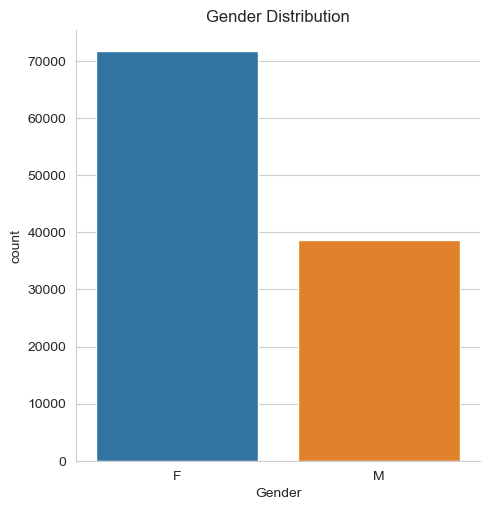

In [49]:
#viewing count plot of gender distribution in our dataset
sns.catplot(x='Gender',data=df,kind='count') #sns.countplot(x = 'Gender', data = df)
plt.title("Gender Distribution")
plt.show()

C:\Users\b0268660\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


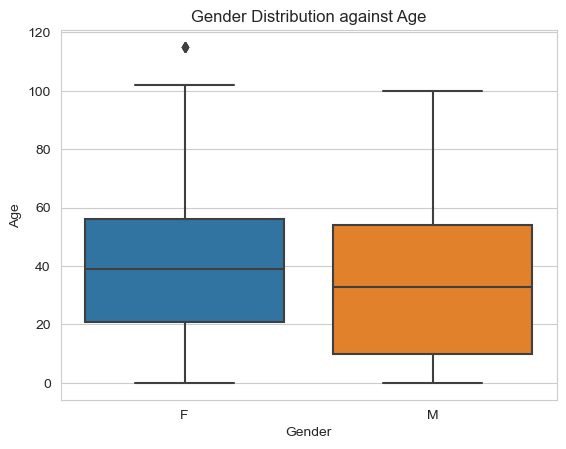

In [50]:
#viewing count plot of gender distribution against age in our dataset
sns.boxplot(x='Gender',y='Age',data=df)
plt.title("Gender Distribution against Age")
plt.show()

- we can notice that nearly half of our dataset conists of women with wider age destribution and some outliers, all of which achiees a rate higher than men.m

In [52]:
df['No-show'].value_counts()

No-show
True     88207
False    22314
Name: count, dtype: int64

- it is obvious that 79.8% of our patients did show up on their appointments and only 20.1% of them did not.
#### lets dive deeper to see if this is related to gender.

### Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?

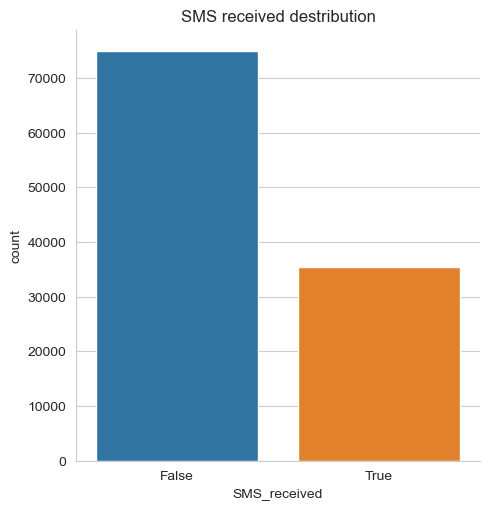

In [60]:
#viewing count plot of recieving SMS distribution in our dataset
sns.catplot(x='SMS_received',data=df,kind='count') #sns.countplot(x = 'SMS_received', data = df)
plt.title("SMS received destribution")
plt.show()

In [61]:
df['SMS_received'].value_counts()

SMS_received
False    75039
True     35482
Name: count, dtype: int64

- we can see that 67.8% of our patients did not reciee any SMS reminder of their appointments, cound this be affecting their showin up?

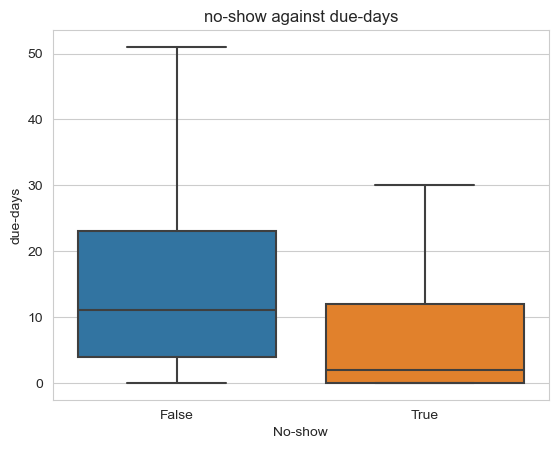

In [63]:
#viewing the correlation between no-show and due-days without ouliers
sns.boxplot(x='No-show',y='due-days',data=df,showfliers=False)
plt.title('no-show against due-days')
plt.show()

- It is clear that there is a correlation between number od due days and whether a patient shows up or not.
- patient with appointments from 0 to 30 days tend to show up more regularly, while patients with higher number of days tend to not show up.

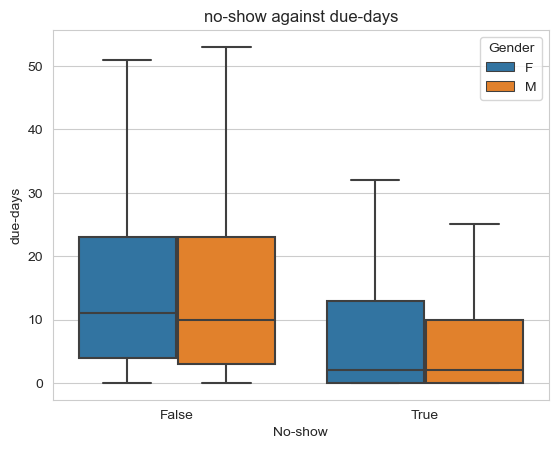

In [64]:
#viewing the correlation between no-show and due-days without outliers with respect to gender
sns.boxplot(x='No-show',y='due-days',data=df,hue='Gender',showfliers=False)
plt.title('no-show against due-days')
plt.show()

- gender does not affect number of due days and showing up at an appointment that much.

#### Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?

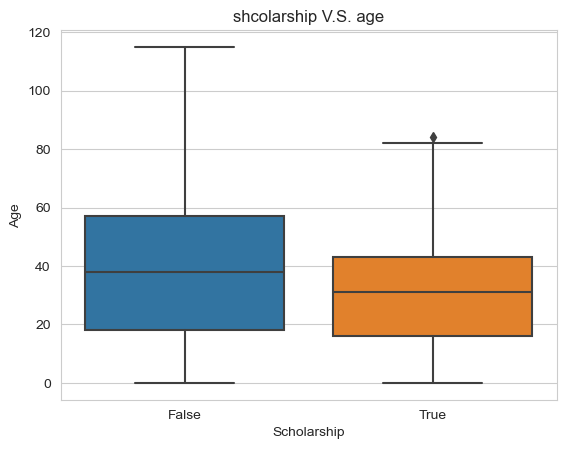

In [66]:
#plotting having a scholarship against age
sns.boxplot(x='Scholarship',y='Age',data=df)
plt.title('shcolarship V.S. age')
plt.show()

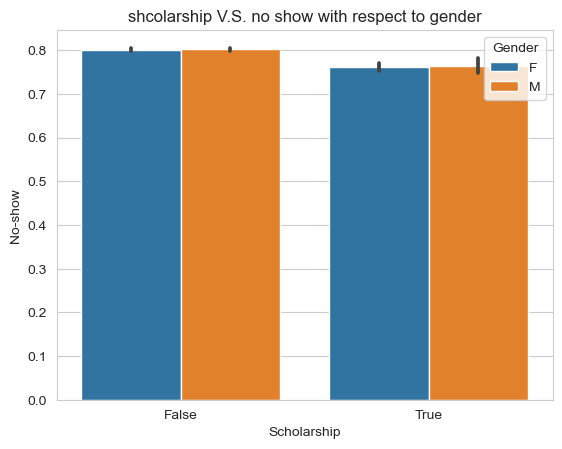

In [67]:
#plotting having a scholarship against no show with respect to gender
sns.barplot(x='Scholarship',y='No-show',hue='Gender',data=df)
plt.title('shcolarship V.S. no show with respect to gender')
plt.show()

<Axes: >

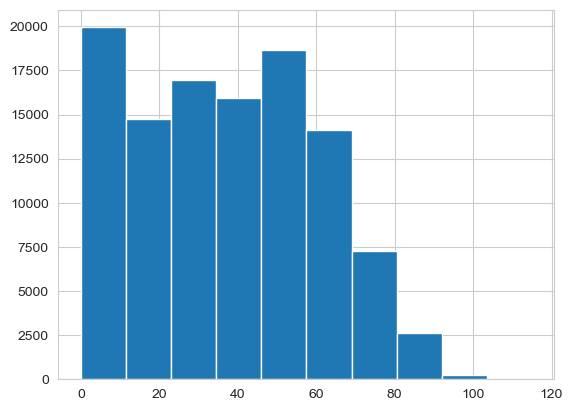

In [68]:
#plotting age distribution
df['Age'].hist()

- we can see that having a scolarship does not affect showing up to a doctor appointment that much and that huge age group is enrolled to that scholarship and also enrol their babies on.

### Conclusion
#### Q1: How often do men go to hospitals compared to women? Which of them is more likely to show up?
- Nearly half of our dataset conists of women with wider age destribution and some outliers, all of which achiees a rate higher than men.

- It is obvious that 79.8% of our patients did show up on their appointments and only 20.1% of them did not.

- Women do show up on their appointments more often than men do, but this may b affected by the percentage of women on this dataset.

#### Q2: Does recieving an SMS as a reminder affect whether or not a patient may show up? is it correlated with number of days before the appointment?
67.8% of our patients did not reciee any SMS reminder of their appointments, yet they showed up on their appointments.
- It is clear that there is a positive correlation between number of due days and whether a patient shows up or not.
- Patient with appointments from 0 to 30 days tend to show up more regularly, while patients with higher number of days tend to not show up.
- gender does not affect number of due days and showing up at an appointment that much.
    
#### Q3: Does having a scholarship affects showing up on a hospital appointment? What are the age groups affected by this?
- Having a scholarship does not affect showing up to a doctor appointment that much.
- Huge age group is enrolled to that scholarship and also enrol their babies on.
    
#### Q4: Does having certain deseases affect whather or not a patient may show up to their appointment? is it affected by gender?
- We can conclude that the vast majority of our dataset does not have chronic deseases, yet, they are existed in so many young people.
- Having a chronic deseas may affect your showing up at a hospital's appointment.